In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
cust_data = pd.read_csv('Customer_segmentation_data.csv')
cust_data.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2021-12-01,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01,3.39,17850.0,United Kingdom


In [3]:
cust_data.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
495473,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2022-12-09,1.95,15804.0,United Kingdom
495474,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2022-12-09,2.95,13113.0,United Kingdom
495475,541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2022-12-09,1.25,13113.0,United Kingdom
495476,541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2022-12-09,8.95,13113.0,United Kingdom
495477,541893,581586,20685,DOORMAT RED RETROSPOT,10,2022-12-09,7.08,13113.0,United Kingdom


# Data Cleaning

In [4]:
# remove the first column
cust_data.drop(cust_data.columns[0],axis=1,inplace=True)
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01,3.39,17850.0,United Kingdom


# Checking The Null-Values

In [5]:
cust_data.isnull().sum().sum()

135054

In [6]:
cust_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [7]:
cust_data.shape

(495478, 8)

In [8]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [9]:
cust_data[(cust_data.CustomerID == 17850.0) & (cust_data.InvoiceNo == '536365')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2021-12-01,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2021-12-01,4.25,17850.0,United Kingdom


In [10]:
cust_data[(cust_data.CustomerID == 17850.0)].InvoiceNo.unique()

array(['536365', '536366', '536372', '536373', '536375', '536377',
       '536396', '536399', '536406', '536407', '536600', '536601',
       '536602', '536603', '536609', '536610', '536612', '536614',
       '536628', '536629', '536630', '536631', '536685', '536688',
       '536690', '536693', '536750', '536751', '536752', '536753',
       '536787', '536789', '536790', '536791', 'C543611'], dtype=object)

# We need 3 things here, Recency , Frequency and Monetary

In [11]:
cust_data.InvoiceDate.min()

'2021-12-01'

In [12]:
cust_data.InvoiceDate.max()

'2022-12-09'

In [13]:
from datetime import datetime
datetime(2023,1,1)
datetime.now()

datetime.datetime(2023, 3, 18, 21, 21, 42, 334058)

In [14]:
# convert the string to date time 
cust_data.InvoiceDate = pd.to_datetime(cust_data.InvoiceDate)
cust_data.InvoiceDate.apply(lambda x: (datetime.now() - x).days)

0         472
1         472
2         472
3         472
4         472
         ... 
495473     99
495474     99
495475     99
495476     99
495477     99
Name: InvoiceDate, Length: 495478, dtype: int64

In [15]:
# calculate frequency
cust_data.groupby(['CustomerID'])['InvoiceNo'].count()

CustomerID
12346.0       2
12747.0     103
12748.0    4642
12749.0     231
12820.0      59
           ... 
18280.0      10
18281.0       7
18282.0      13
18283.0     756
18287.0      70
Name: InvoiceNo, Length: 3950, dtype: int64

# calculate the total amount spent by customer

In [16]:
cust_data['Total_amount'] = cust_data.Quantity * cust_data.UnitPrice
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01,3.39,17850.0,United Kingdom,20.34


In [17]:
cust_data[cust_data.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
57697,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2022-01-18,1.04,12346.0,United Kingdom,77183.6
57702,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2022-01-18,1.04,12346.0,United Kingdom,-77183.6


In [18]:
# remove the negeative numbers from data
cust_data = cust_data [(cust_data.Quantity > 0) & (cust_data.UnitPrice > 0)]
#cust_data.groupby('CustomerID').agg({'Total_amount' : sum , 'Quantity': max})
cust_data[cust_data.CustomerID == 12747.0].InvoiceDate.max()

Timestamp('2022-12-07 00:00:00')

In [19]:
cust_data.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (datetime.now() - x.max()).days  
                                     , 'InvoiceNo': lambda x : x.count()
                                    , 'Total_amount' : lambda x : x.sum()})

,InvoiceDate,InvoiceNo,Total_amount
CustomerID,,,
12346.0,424,1,77183.60
12747.0,101,103,4196.01
12748.0,99,4595,33719.73
12749.0,102,199,4090.88
12820.0,102,59,942.34
...,...,...,...
18280.0,376,10,180.60
18281.0,279,7,80.82
18282.0,106,12,178.05


In [20]:
Cust_RFM = cust_data.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (datetime.now() - x.max()).days  
                                     , 'InvoiceNo': lambda x : x.count()
                                    , 'Total_amount' : lambda x : x.sum()})
Cust_RFM.head()

,InvoiceDate,InvoiceNo,Total_amount
CustomerID,,,
12346.0,424,1,77183.60
12747.0,101,103,4196.01
12748.0,99,4595,33719.73
12749.0,102,199,4090.88
12820.0,102,59,942.34


# Rename the Columns

In [21]:
Cust_RFM.rename(columns={'InvoiceDate':'Recency' , 'InvoiceNo':'Frequency','Total_amount' : 'Monetary'}, inplace=True)
Cust_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,424,1,77183.60
12747.0,101,103,4196.01
12748.0,99,4595,33719.73
12749.0,102,199,4090.88
12820.0,102,59,942.34


# Plot the distribution plot of individual features for transformation

<AxesSubplot:xlabel='Recency', ylabel='Density'>

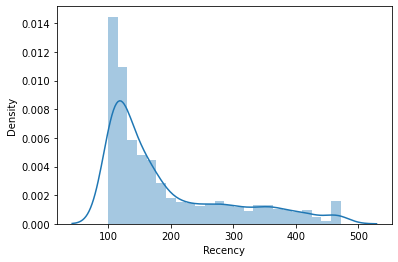

In [25]:
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
sns.distplot(Cust_RFM.Recency)

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

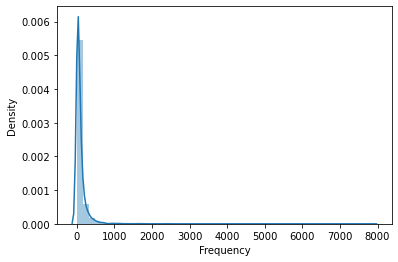

In [26]:
sns.distplot(Cust_RFM.Frequency)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

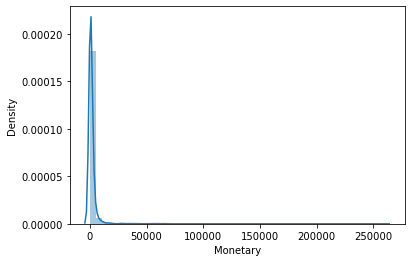

In [27]:
sns.distplot(Cust_RFM.Monetary)

# Apply logarithmic Transformation to all Features

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

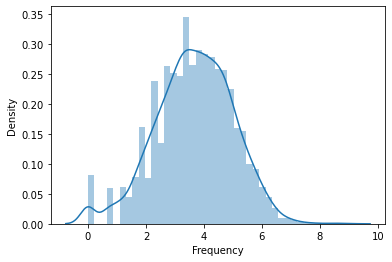

In [28]:
Cust_RFM.Recency = np.log(Cust_RFM.Recency)
Cust_RFM.Frequency = np.log(Cust_RFM.Frequency)
Cust_RFM.Monetary = np.log(Cust_RFM.Monetary)
sns.distplot(Cust_RFM.Frequency)

,Recency,Frequency,Monetary
CustomerID,,,


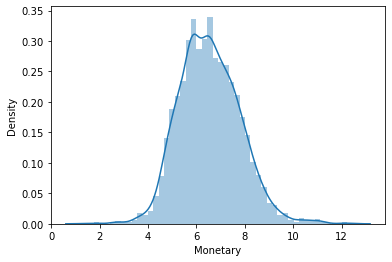

In [29]:
sns.distplot(Cust_RFM.Monetary)
Cust_RFM[Cust_RFM.Monetary == -np.inf]

In [30]:
Cust_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,6.049733,0.000000,11.253942
12747.0,4.615121,4.634729,8.341889
12748.0,4.595120,8.432724,10.425838
12749.0,4.624973,5.293305,8.316515
12820.0,4.624973,4.077537,6.848366


# Build model using K_means and DBSCAN

# k_mean = KMeans() finding best value for K

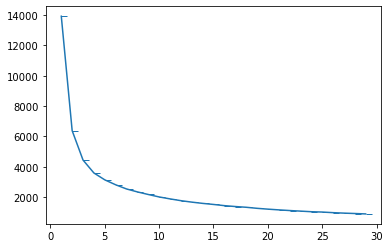

In [31]:
error = []
for i in range(1,30):
    k_mean = KMeans(n_clusters=i , n_init=10).fit(Cust_RFM)
    error.append(k_mean.inertia_)
plt.plot(range(1,30),error, marker=True)

In [32]:
# best value we have got is 5...
k_mean= KMeans(n_clusters=5)
k_mean.fit_predict(Cust_RFM)

array([2, 1, 4, ..., 3, 4, 1])

In [33]:
Cust_RFM['label'] = k_mean.labels_
Cust_RFM.head()

,Recency,Frequency,Monetary,label
CustomerID,,,,
12346.0,6.049733,0.000000,11.253942,2
12747.0,4.615121,4.634729,8.341889,1
12748.0,4.595120,8.432724,10.425838,4
12749.0,4.624973,5.293305,8.316515,4
12820.0,4.624973,4.077537,6.848366,2


In [34]:
Cust_RFM[Cust_RFM.label ==0]

,Recency,Frequency,Monetary,label
CustomerID,,,,
12821.0,5.746203,1.791759,4.529584,0
12855.0,6.154858,1.098612,3.640214,0
12863.0,5.017280,1.609438,6.256134,0
12864.0,5.468060,1.098612,4.991249,0
12873.0,5.942799,1.386294,5.924256,0
...,...,...,...,...
18268.0,5.451038,0.000000,3.238678,0
18269.0,6.142037,1.945910,5.127529,0
18273.0,4.615121,1.098612,5.318120,0


In [35]:
Cust_RFM[Cust_RFM.label ==4]

,Recency,Frequency,Monetary,label
CustomerID,,,,
12748.0,4.595120,8.432724,10.425838,4
12749.0,4.624973,5.293305,8.316515,4
12839.0,4.615121,5.749393,8.628989,4
12841.0,4.634729,6.040255,8.299622,4
12856.0,4.663439,5.749393,7.687048,4
...,...,...,...,...
18223.0,4.634729,5.605802,8.777176,4
18225.0,4.624973,5.602119,8.614160,4
18226.0,4.962845,5.488938,8.561794,4


In [36]:
silhouette_score(Cust_RFM.drop('label',axis=1) ,Cust_RFM.label)

0.2838133791379731

In [37]:
# Diamond , Gold , Silver , Bronz , Other
label = {0:'Diamond' , 1: 'Gold' , 2: "Silver" ,3 : 'Bronz' ,4: 'Other'}
Cust_RFM['Status'] = Cust_RFM.label.map(label)
Cust_RFM.head()

,Recency,Frequency,Monetary,label,Status
CustomerID,,,,,
12346.0,6.049733,0.000000,11.253942,2,Silver
12747.0,4.615121,4.634729,8.341889,1,Gold
12748.0,4.595120,8.432724,10.425838,4,Other
12749.0,4.624973,5.293305,8.316515,4,Other
12820.0,4.624973,4.077537,6.848366,2,Silver


In [38]:
dbs = DBSCAN(eps= 0.7 , min_samples=8 )
dbs.fit_predict(Cust_RFM.iloc[:,:-1])

array([-1,  0, -1, ...,  4,  1,  0], dtype=int64)

In [39]:
np.unique(dbs.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)